# Digital Twin - Calculate RUL of Engine Simulated Data

## Load Dataset

In [1]:
import pandas as pd 
import numpy as np 
# read the dataset 

columns = ['unitid', 'time', 'set_1','set_2','set_3'] 
columns.extend(['sensor_' + str(i) for i in range(1,22)]) 
df_train = pd.read_csv('./train_FD001.txt', delim_whitespace=True, names=columns) 
df_test = pd.read_csv('./test_FD001.txt', delim_whitespace=True, names=columns) 


/tmp/ipykernel_3711/3639696060.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_train = pd.read_csv('./train_FD001.txt', delim_whitespace=True, names=columns)
/tmp/ipykernel_3711/3639696060.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_test = pd.read_csv('./test_FD001.txt', delim_whitespace=True, names=columns)


## Filter dataset
use only unitid = 1

In [2]:
unitid = 1
df_train = df_train[df_train['unitid']==unitid]
df_test = df_test[df_test['unitid']==unitid]

/tmp/ipykernel_3711/1225373059.py:9: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  ax = sns.lineplot(x="time", y=column, hue='unitid', legend=False, data=df_train, ax=ax, palette=sns.dark_palette("#000000"))
/tmp/ipykernel_3711/1225373059.py:9: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  ax = sns.lineplot(x="time", y=column, hue='unitid', legend=False, data=df_train, ax=ax, palette=sns.dark_palette("#000000"))
/tmp/ipykernel_3711/1225373059.py:9: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  ax = sns.lineplot(x="time", y=column, hue='unitid', legend=False, data=df_train, ax=ax, palette=sns.dark_palette("#000000"))
/tmp/ipykernel_3711/1225373059.py:9: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  ax = sns.lineplot(x="time", y=column, hue='unitid', legend=False, data=df_train, ax=ax, palet

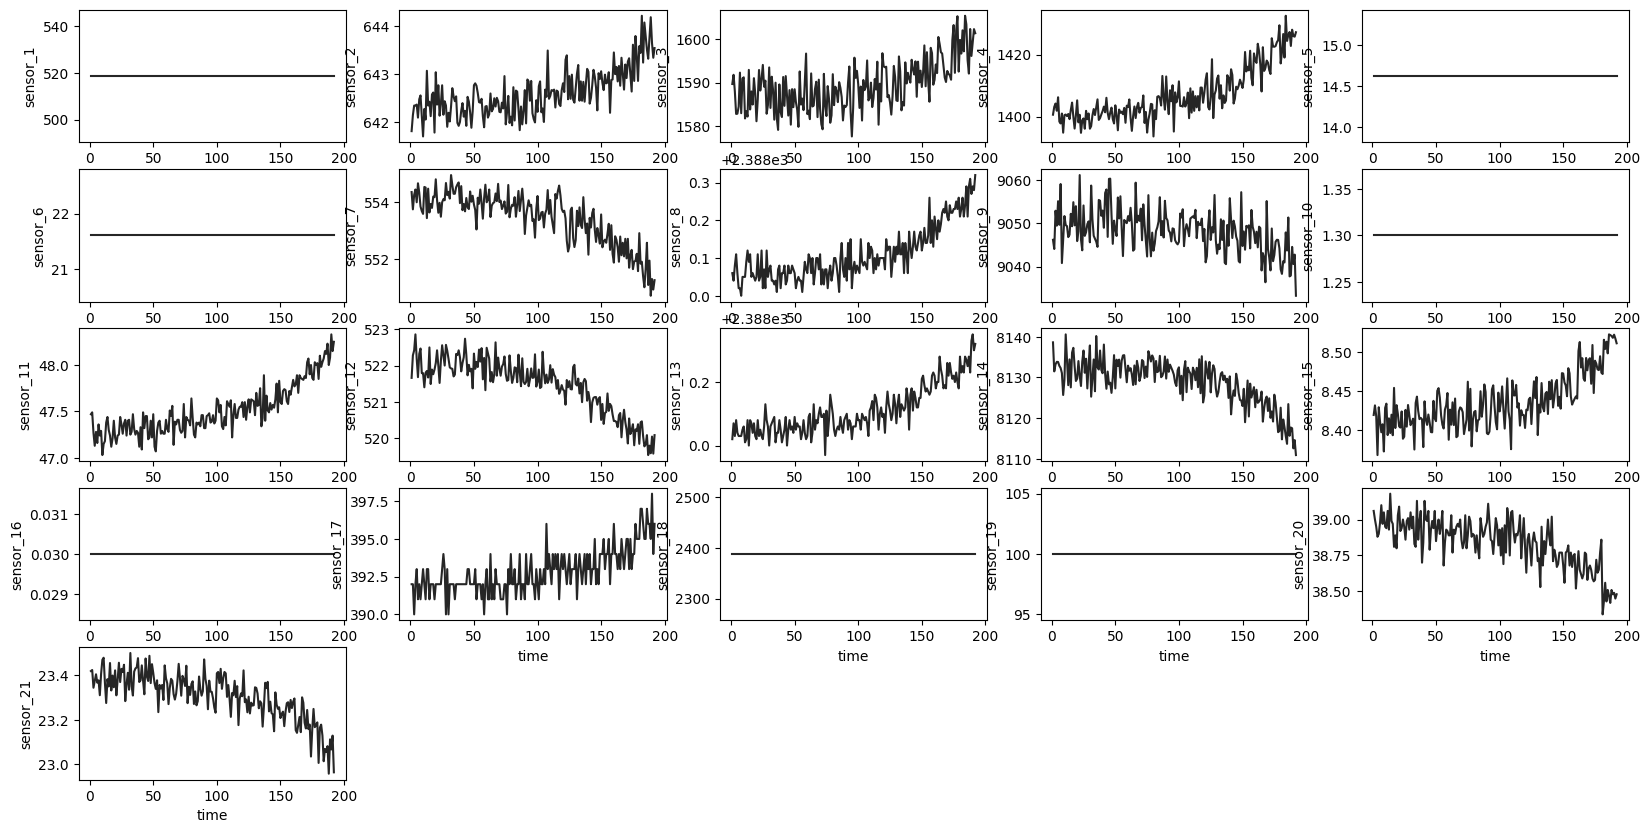

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 
i=0 
plt.figure(figsize=(20,10))
for column in df_train: 
    if ('sensor' in column): 
        i=i+1 
        ax= plt.subplot(5,5,i)
        ax = sns.lineplot(x="time", y=column, hue='unitid', legend=False, data=df_train, ax=ax, palette=sns.dark_palette("#000000")) 
        
plt.show() 

# analysis of variance 

In [6]:

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
df_std = df_train.groupby('unitid').std() 
df_std

,time,set_1,set_2,set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
unitid,,,,,,,,,,,,,,,,,,,,,,,,,
1,55.569776,0.001953,0.000282,0.0,0.0,0.486795,5.759776,8.56561,0.0,0.0,0.910414,0.070914,4.911853,0.0,0.268346,0.749176,0.07696,5.563129,0.034125,0.0,1.475661,0.0,0.0,0.166998,0.105101


In [7]:
df_train.columns

Index(['unitid', 'time', 'set_1', 'set_2', 'set_3', 'sensor_1', 'sensor_2',
       'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8',
       'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18',
       'sensor_19', 'sensor_20', 'sensor_21'],
      dtype='object')

In [8]:
X_columns =['set_1', 'set_2',
            'sensor_2',
       'sensor_3', 'sensor_4', 
        'sensor_7', 'sensor_8',
       'sensor_9',  'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_15',  'sensor_17',
            'sensor_20', 'sensor_21']

df_train=df_train[X_columns]
df_test=df_test[X_columns]

In [9]:
from scipy.stats import pearsonr  

def calculate_pvalues(df): 
    df = df.dropna()._get_numeric_data() 
    dfcols = pd.DataFrame(columns=df.columns)  
    pvalues = dfcols.transpose().join(dfcols, how='outer') 
    for r in df.columns:  
        for c in df.columns:  
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
            
    return pvalues   
    
print('correlation engine 1')  
print(calculate_pvalues(df_train))

correlation engine 1


/tmp/ipykernel_3711/128266545.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)


            set_1   set_2 sensor_2 sensor_3 sensor_4 sensor_7 sensor_8  \
sensor_11  0.3022  0.6832      0.0      0.0      0.0      0.0      0.0   
sensor_12  0.1626  0.2476      0.0      0.0      0.0      0.0      0.0   
sensor_13  0.0723  0.4967      0.0      0.0      0.0      0.0      0.0   
sensor_14  0.0323   0.499      0.0      0.0      0.0      0.0      0.0   
sensor_15  0.2468  0.4025      0.0      0.0      0.0      0.0      0.0   
sensor_17  0.1325  0.9664      0.0      0.0      0.0      0.0      0.0   
sensor_2   0.1034  0.9675      0.0      0.0      0.0      0.0      0.0   
sensor_20  0.1565  0.5564      0.0      0.0      0.0      0.0      0.0   
sensor_21  0.3196  0.8613      0.0      0.0      0.0      0.0      0.0   
sensor_3    0.376  0.9031      0.0      0.0      0.0      0.0      0.0   
sensor_4   0.0967  0.8364      0.0      0.0      0.0      0.0      0.0   
sensor_7   0.1503  0.9329      0.0      0.0      0.0      0.0      0.0   
sensor_8   0.0283  0.9128      0.0    

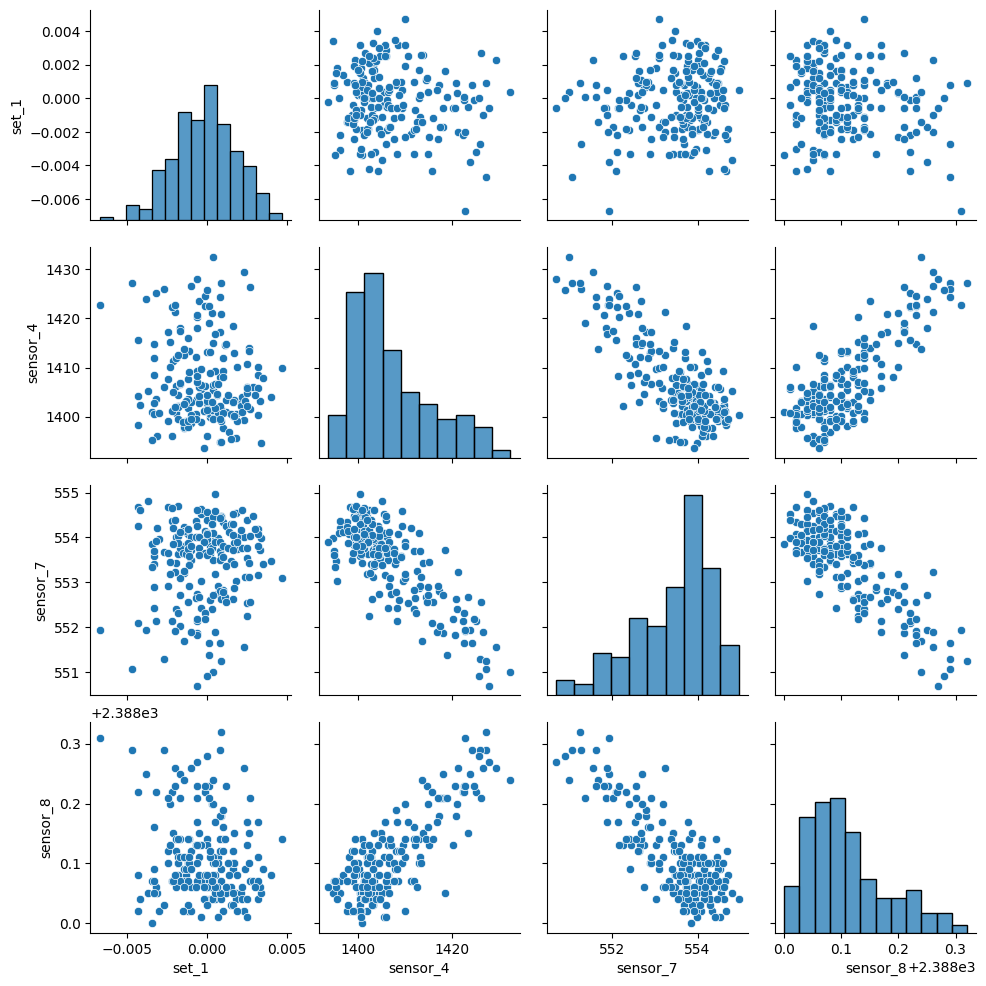

In [11]:
# showing correlation  
import matplotlib.pyplot as plt   
import seaborn as sns
few_columns =['set_1', 'sensor_4', 
        'sensor_7', 'sensor_8']
sns.pairplot(df_train, vars=few_columns)  
plt.show() 

In [89]:
from sklearn.preprocessing import MinMaxScaler

def create_train_dataset(dataset): 
    dataX, dataY = [], []
    n = len(dataset)
    start=int(len(dataset)/10*4)
    for i in range(start):
        a = dataset[i] 
        b = (n-start) / n
        dataX.append(a)
        dataY.append(b)
    for i in range(start, n): 
        a=dataset[i] 
        b=(n-i) / n 
        dataX.append(a)
        dataY.append(b)

    return np.array(dataX).astype('float32'), np.array(dataY).astype('float32')


def scale_dataset(ds_train, ds_test): 
    scaler = MinMaxScaler(feature_range=(0, 1)) 
    ds_train = scaler.fit_transform(ds_train)
    ds_test = scaler.transform(ds_test)
    return ds_train, ds_test 

X_train,y_train =  create_train_dataset(df_train.values)
X_test,_ =  create_train_dataset(df_test.values)

X_train, X_test = scale_dataset(X_train, X_test)

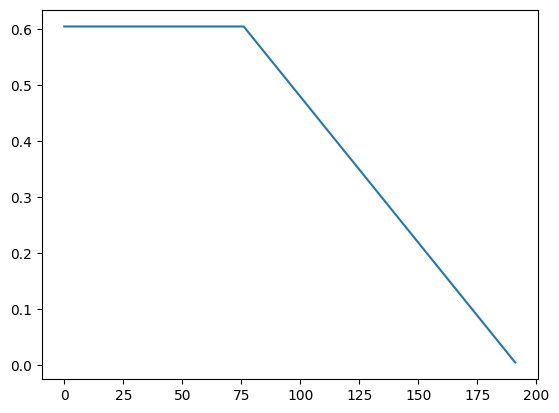

In [90]:
plt.plot(y_train)

In [91]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.utils import shuffle

X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train)

kernel = 1 * RBF(length_scale=1.0)
baseline_model = sklearn.gaussian_process.GaussianProcessRegressor(kernel=kernel)
#baseline_model = sklearn.ensemble.RandomForestRegressor(3000)
baseline_model.fit(X_train_shuffled, y_train_shuffled)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1))

In [92]:
y_pred = baseline_model.predict(X_train) 
y_pred = np.array(y_pred * len(X_train))
print( y_pred[-1], np.min(y_pred) )

1.0000000377358802 1.0000000377358802


In [93]:
y_pred = baseline_model.predict(X_test)
y_pred = np.array(y_pred * len(X_train))
print( y_pred[-1] ) #attended 112

114.97540674351524


In [94]:
# fit the model 
import torch.nn as nn

class JetDigitalTiwnModel(nn.Module):
    def __init__(self, input_size, hidden_size=16):
        super().__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(hidden_size, hidden_size*2)
        self.act2= nn.ReLU()
        self.out = nn.Linear(hidden_size*2, 1)
        self.act = nn.ReLU()
    
    def forward(self, x):
        x = self.act1( self.hidden1 (x) )
        x = self.act2( self.hidden2 (x) )
        x = self.act( self.out(x) )
        return x


In [156]:
import torch
from torch.utils.data import Dataset

import torch
torch.manual_seed(0)
import random
random.seed(0)
import numpy as np
np.random.seed(0)

class MyDataset(Dataset):
    def __init__(self, x, y):
        super(MyDataset, self).__init__()
        assert x.shape[0] == y.shape[0] # assuming shape[0] = dataset size
        self.x = x
        self.y = y

    def __len__(self):
        return self.y.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

def train_model(model, X_train, y_train, num_epochs = 1000, learning_rate = 1e-4, batch_size=16):
    
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1,1)
    
    criterion = torch.nn.MSELoss()    # mean-squared error for regression
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    loader = torch.utils.data.DataLoader(MyDataset(X_train, y_train), batch_size=batch_size, shuffle=True)

    history = {'loss':[]}
    
    # Train the model
    for epoch in range(num_epochs):
        for batch_idx, (_X, _y) in enumerate(loader):

            model.train()
            outputs = model(_X)
            optimizer.zero_grad()
            
            # obtain the loss function
            loss = criterion(outputs, _y)
            
            loss.backward()
            
            optimizer.step()
            
        if epoch % 100 == 0:
            print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()), "LR:", optimizer.param_groups[0]['lr'])
        history['loss'].append(loss.item())

    return model, history

In [157]:
model = JetDigitalTiwnModel(input_size=X_train.shape[1])
print(model)


JetDigitalTiwnModel(
  (hidden1): Linear(in_features=16, out_features=16, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=16, out_features=32, bias=True)
  (act2): ReLU()
  (out): Linear(in_features=32, out_features=1, bias=True)
  (act): ReLU()
)


In [158]:
model, history = train_model(model, X_train, y_train)

Epoch: 0, loss: 0.22300 LR: 0.0001
Epoch: 100, loss: 0.00327 LR: 0.0001
Epoch: 200, loss: 0.00411 LR: 0.0001
Epoch: 300, loss: 0.00106 LR: 0.0001
Epoch: 400, loss: 0.00100 LR: 0.0001
Epoch: 500, loss: 0.00126 LR: 0.0001
Epoch: 600, loss: 0.00169 LR: 0.0001
Epoch: 700, loss: 0.00055 LR: 0.0001
Epoch: 800, loss: 0.00090 LR: 0.0001
Epoch: 900, loss: 0.00148 LR: 0.0001


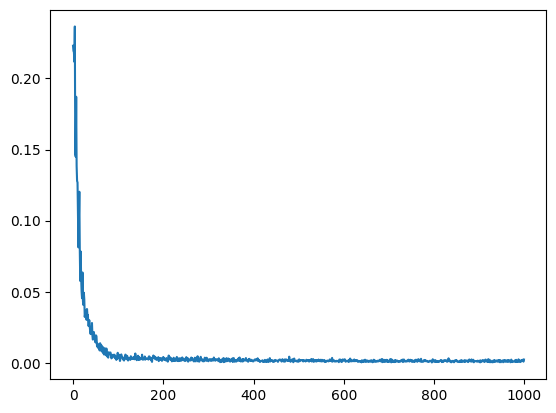

In [159]:
import matplotlib.pyplot as plt
plt.plot(history['loss'])

In [160]:
import matplotlib.pyplot as plt
def test_model(X, y_test):
    # evaluate model:
    model.eval()

    n = len(X_train)
    
    with torch.no_grad():
        out_data = model(torch.tensor(X, dtype=torch.float32))
    rul = (out_data*n).numpy().flat[-1]
    print('Rul:',rul,'Error:', abs(rul-y_test)/y_test)


    plt.plot((out_data*n).numpy()) #112
    plt.show()

Rul: 0.39132643 Error: 0.6086735725402832


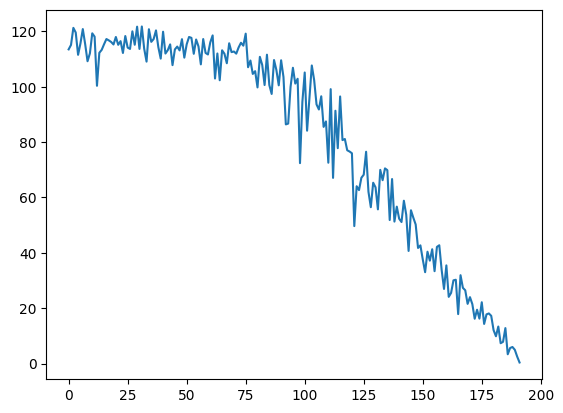

In [161]:
test_model(X_train, y_test=1)

Rul: 113.166756 Error: 0.010417461395263672


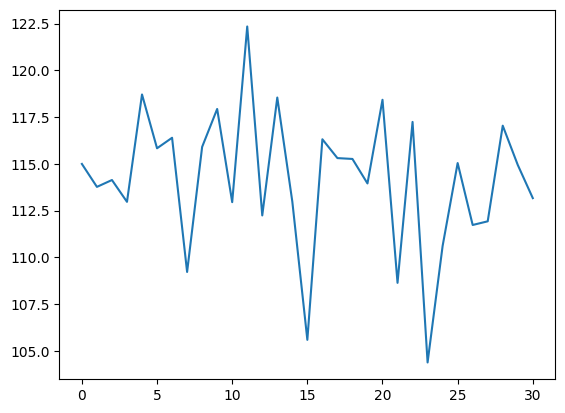

In [162]:
test_model(X_test, y_test=112)